In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
# import missingno as msno
from sklearn.utils import shuffle 
# from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

### **Load Data**

In [2]:
columns_to_drop = ['id', 'price', 'data_source']

train_data = pd.read_csv('train_data.csv').drop(columns=['brand_name', 'model_name', 'type_name', 'color_name', 'transmission_name', 'condition_name', 'province_name', 'region_name'], axis=1)
test_data = pd.read_csv('test_data.csv').drop(columns=['brand_name', 'model_name', 'type_name', 'color_name', 'transmission_name', 'condition_name', 'province_name', 'region_name'], axis=1)

x_train = train_data.drop(columns=columns_to_drop, axis=1)
y_train = train_data['price']

x_test = test_data.drop(columns=columns_to_drop, axis=1)
y_test = test_data['price']

# Check the shapes to ensure they match
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)



x_train shape: (575736, 11)
y_train shape: (575736,)
x_test shape: (143932, 11)
y_test shape: (143932,)


In [3]:
train_data.head()

,id,brand,model,type,color,year,mileage,transmission,condition,price,province,region,data_source,age
0,a01969a8-6cd8-4cb4-a572-e51467d32fe4,0,73,186,9,2017,20000,0,1,475000000.0,7,271,OLX,7
1,08b61c87-6b06-48d2-b90b-ca128484684c,0,73,186,6,2017,65000,0,1,320000000.0,7,271,OLX,7
2,9c501c4d-26fa-406e-a2e5-0b30d006c31f,0,73,198,9,2017,10000,0,1,450000000.0,7,271,OLX,7
3,17603f16-fbff-41d4-b61b-285633dcd2de,0,73,198,9,2023,20000,0,1,510000000.0,7,271,OLX,1
4,27baaa5f-325b-4b00-961d-ea8fd83e70cb,0,73,198,11,2017,35000,0,1,334375000.0,7,271,OLX,7


In [4]:
test_data.head()

,id,brand,model,type,color,year,mileage,transmission,condition,price,province,region,data_source,age
0,20e02bbd-6cc5-4a17-b074-8f504a3795bd,0,73,186,5,2004,110000,1,1,110000000.0,3,271,OLX,20
1,bd8af6e9-e475-4081-bd96-ac45e69aecc5,0,73,198,6,2018,25000,0,1,375000000.0,7,271,OLX,6
2,9e4b876f-8f3d-403b-a22e-be6cc3fa3412,0,73,303,9,2016,15000,0,1,450000000.0,7,271,OLX,8
3,add3c3ac-c405-4ce3-a1ef-7162ea8d27fe,0,73,303,9,2016,15000,0,1,395000000.0,7,271,OLX,8
4,a54e3fe3-e172-453b-a5c5-dc8ab0562026,0,73,945,0,2004,90000,0,1,145000000.0,7,271,OLX,20


Text(0, 0.5, 'frequency')

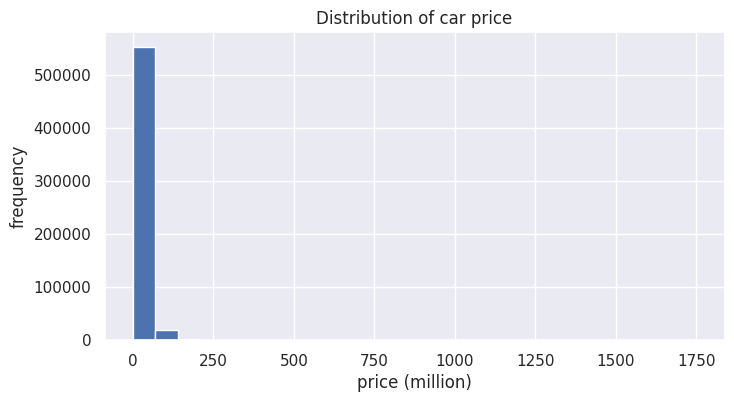

In [5]:
import matplotlib.pyplot as plt

train_data['price'].div(10000000).plot.hist(bins=25, figsize=(8,4))
plt.title('Distribution of car price')
plt.xlabel('price (million)')
plt.ylabel('frequency')

### **Linear Regression**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# predictions
# y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [7]:
from sklearn import metrics

print("MAE data train:", metrics.mean_absolute_error(y_test,y_test_pred))
print("RMSE data train:", np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print("R-squared train:", round(metrics.r2_score(y_test,y_test_pred),3))

MAE data train: 128348449.71465443
RMSE data train: 336374017.27608526
R-squared train: 0.164


### **Regplot for Linear Regression Output**

We would be using the seaborn's regplot to better understand how the data is spread. We see how the values are spread out and get a good understanding. We can understand from the plot that the predictions were very close to the actual values that we have considered. 

In [8]:
y_test_pred = pd.DataFrame(y_test_pred, columns = ['Predicted Output'])

In [9]:
results = pd.concat([y_test_pred, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

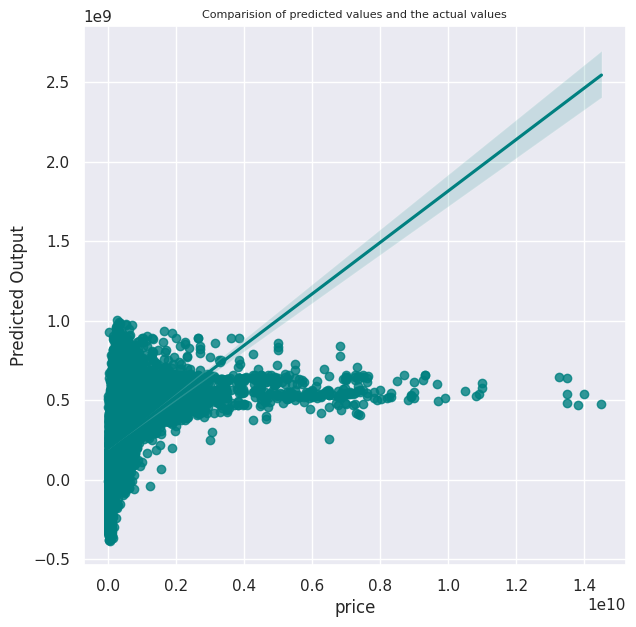

In [13]:
plt.figure(figsize = (7, 7))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 8)
plt.show()